In [7]:
from scipy.signal import correlate
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

In [8]:
piano_cerca, sr_cerca = sf.read('archivos_ejc1/piano_cerca.wav')
piano_lejos, sr_lejos = sf.read('archivos_ejc1/piano_lejos.wav')

In [9]:
m_piano_cerca = np.shape(piano_cerca)
m_piano_lejos = np.shape(piano_lejos)

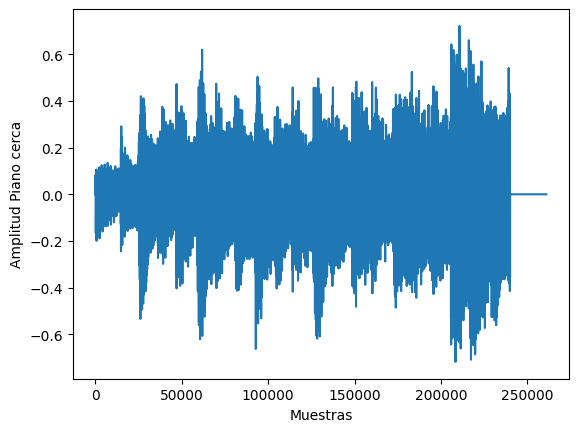

In [10]:
fig, ax = plt.subplots()
ax.plot(piano_cerca)
ax.set_xlabel('Muestras')
ax.set_ylabel('Amplitud Piano cerca')
plt.show()

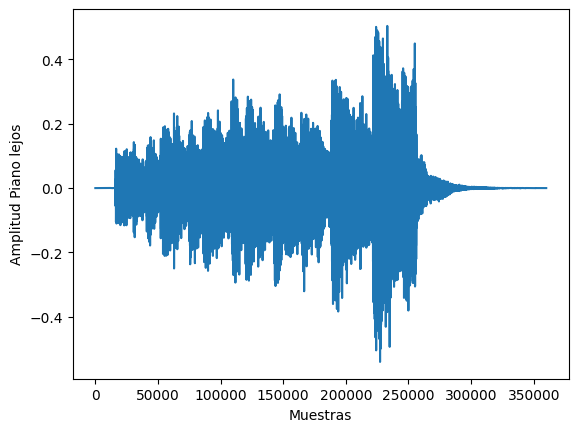

In [11]:
fig, ax = plt.subplots()
ax.plot(piano_lejos)
ax.set_xlabel('Muestras')
ax.set_ylabel('Amplitud Piano lejos')
plt.show()

In [12]:
# no tocar
r_xy = correlate(piano_cerca, piano_lejos, mode = 'full', method = 'fft')

In [13]:
np.shape(r_xy)

(620999,)

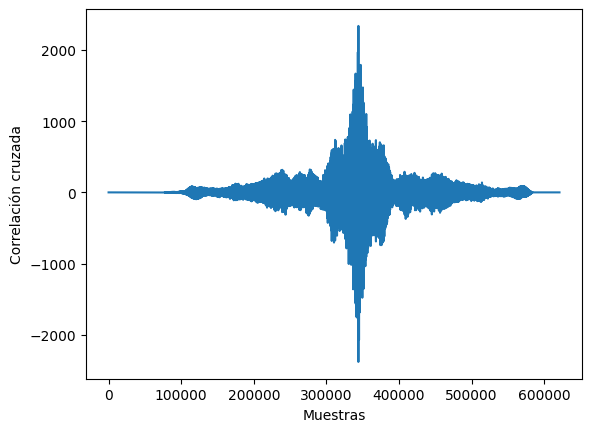

In [14]:
fig, ax = plt.subplots()
ax.plot(r_xy)
ax.set_xlabel('Muestras')
ax.set_ylabel('Correlación cruzada')
plt.show()

In [15]:
m_max_r_xy = np.argmax(r_xy) # el valor del máximo de la correlación no es el retraso en muestras, es la cantidad de muestras que se corrio la señal y[n] para que sea lo mas similar con x[n].
delay = m_piano_lejos - m_max_r_xy # como se desplaza y[n], hay que restar 
delay = delay[0]
print(delay)
print((delay/sr_lejos)*343) #distancia  


15908
113.67591666666668


In [16]:
piano_lejos_alineado = piano_lejos[delay:]

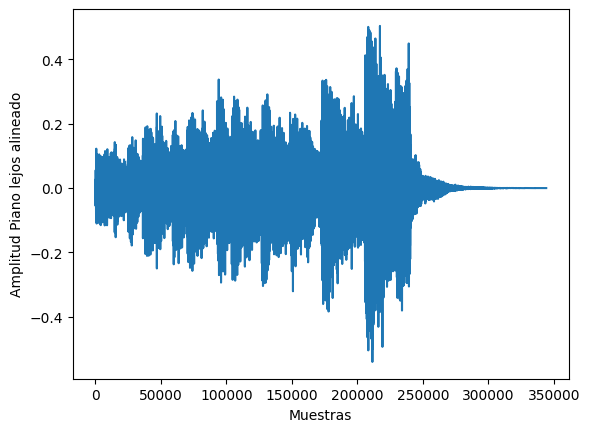

In [17]:
fig, ax = plt.subplots()
ax.plot(piano_lejos_alineado)
ax.set_xlabel('Muestras')
ax.set_ylabel('Amplitud Piano lejos alineado')
plt.show()